<a href="https://colab.research.google.com/github/priya-200/Blog/blob/master/pizza%20or%20steak%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Convolutional neural networks and computer vision with TensorFlow

computer vision is the practice of writing algorithms which ca discover patterns
 in visual data such as the camera of self driving cars

 ## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-17 06:20:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.202.207, 74.125.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   104MB/s    in 1.0s    

2024-04-17 06:20:30 (104 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

Very important step is to understand the data by yourself. So visualize many sample as possible

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list the number of files

for dirpath, dirname, filename in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} Directories and {len(filename)} Images in {dirpath}")

There are 2 Directories and 0 Images in pizza_steak
There are 2 Directories and 0 Images in pizza_steak/train
There are 0 Directories and 750 Images in pizza_steak/train/pizza
There are 0 Directories and 750 Images in pizza_steak/train/steak
There are 2 Directories and 0 Images in pizza_steak/test
There are 0 Directories and 250 Images in pizza_steak/test/pizza
There are 0 Directories and 250 Images in pizza_steak/test/steak


In [ ]:
## Another way to findout the number images

num_steak_images = len(os.listdir("pizza_steak/train/steak"))
num_steak_images

750

## Visualization code

In [ ]:
## Get the class name programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  ## Setup the target directory (we'll view images from here)

  target_folder = target_dir+target_class

  # Get random image

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  image = plt.imread(target_folder+ '/'+ random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {image.shape}")

  return image

In [ ]:
tar = "pizza_steak/train/"+"pizza"
random_image = random.sample(os.listdir(tar),1)
random_image[0]

'3742272.jpg'

['1289139.jpg']
Image shape: (512, 512, 3)


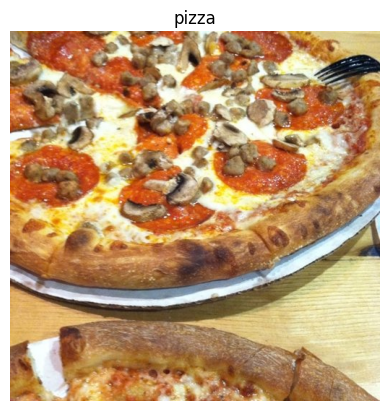

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

## Preprocessing the data

In [ ]:
## Import statements

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

# Preprocess data (Normalize it)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into bathches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42
                                               )
valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed = 42
)

## Build a CNN

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Updated to have a single filter
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 148s 3s/step - loss: 0.6111 - accuracy: 0.6527 - val_loss: 0.4286 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 147s 3s/step - loss: 0.4427 - accuracy: 0.7980 - val_loss: 0.4271 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 138s 3s/step - loss: 0.4302 - accuracy: 0.8047 - val_loss: 0.3701 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 137s 3s/step - loss: 0.3828 - accuracy: 0.8327 - val_loss: 0.3243 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 143s 3s/step - loss: 0.3441 - accuracy: 0.8600 - val_loss: 0.3124 - val_accuracy: 0.8700


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
model_dir = '/content/drive/MyDrive/Data science/pizza or steak/models'
model_path = model_dir+"_model_1"+".h5"
model_1.save(model_path)

In [ ]:
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/Data science/pizza or steak/models_model_1.h5')

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_2.fit(train_data,epochs = 5,
            steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                         )

Epoch 1/5
47/47 [==============================] - 12s 234ms/step - loss: 5.3337 - accuracy: 0.6213 - val_loss: 0.8806 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 0.8539 - accuracy: 0.6907 - val_loss: 0.9637 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6065 - accuracy: 0.7520 - val_loss: 0.5187 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5350 - accuracy: 0.7533 - val_loss: 0.6191 - val_accuracy: 0.6460
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4700 - accuracy: 0.7867 - val_loss: 0.4820 - val_accuracy: 0.7620


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> Here We tried to train our images in two different formates i.e, Convolutional neural network and normal neural networks. We can build neural networks for evry problem. As we saw there is a difference in the accuracy of both the models. Both are runnerd for 5 epochs but the cnn gives the best result. **This is beacuse CNN seeks to sort out and learn the most important patterns in a images even with less number of trainable features**



In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Let's break down what we wrote

# Become one with data

['1248337.jpg']
Image shape: (364, 512, 3)
['1968947.jpg']
Image shape: (512, 512, 3)


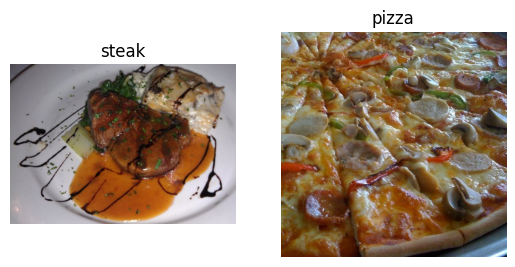

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/",'pizza')

# Preprocess the images

In [ ]:
# Define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to convert our data into `Batches`

In [ ]:
# Create train and test datagenerator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Load in image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    class_mode = 'binary',
    batch_size = 32
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224,224),
    class_mode = 'binary',
    batch_size = 32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# How many images are there in a batch

image,label = train_data.next()
len(image),len(label)

(32, 32)

In [ ]:
# How many batches are there?

len(train_data),1500/32

(47, 46.875)

In [ ]:
## First two images

image[:2],image[0].shape

(array([[[[0.23529413, 0.21568629, 0.09019608],
          [0.2627451 , 0.25490198, 0.10588236],
          [0.2784314 , 0.2627451 , 0.14901961],
          ...,
          [0.3019608 , 0.427451  , 0.5764706 ],
          [0.29411766, 0.41960788, 0.5686275 ],
          [0.2784314 , 0.4039216 , 0.5529412 ]],
 
         [[0.27058825, 0.25882354, 0.12156864],
          [0.28627452, 0.2784314 , 0.11764707],
          [0.31764707, 0.30980393, 0.16078432],
          ...,
          [0.30980393, 0.43529415, 0.58431375],
          [0.3019608 , 0.427451  , 0.5764706 ],
          [0.28627452, 0.41176474, 0.56078434]],
 
         [[0.2627451 , 0.25490198, 0.10588236],
          [0.2784314 , 0.27058825, 0.10980393],
          [0.31764707, 0.30588236, 0.14509805],
          ...,
          [0.30980393, 0.43921572, 0.5764706 ],
          [0.3019608 , 0.43137258, 0.5686275 ],
          [0.2901961 , 0.41960788, 0.5568628 ]],
 
         ...,
 
         [[0.36078432, 0.36862746, 0.427451  ],
          [0.35686

In [ ]:
## Visualize the training images

def view_batch_image():
  for i in range(1,10):
    n = random.randint(0,32)
    plt.subplot(3,3,i)
    plt.imshow(image[n])
    plt.title(label[n])
    plt.axis('off')

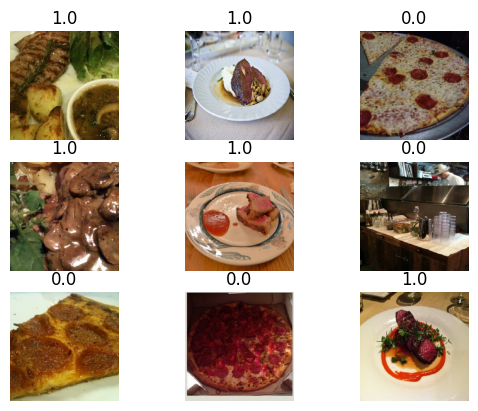

In [ ]:
view_batch_image()

# Create a model

start with base line

A baseline is a relatively simple model or exiting result that you setup and then improvise it by changing its parameter

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           strides = 1,
                           padding = 'valid',
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model

In [ ]:
history = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 192s 4s/step - loss: 1.1961 - accuracy: 0.4933 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 167s 4s/step - loss: 0.6343 - accuracy: 0.6387 - val_loss: 0.4707 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 168s 4s/step - loss: 0.4653 - accuracy: 0.7860 - val_loss: 0.4330 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 164s 4s/step - loss: 0.3460 - accuracy: 0.8573 - val_loss: 0.3623 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 163s 3s/step - loss: 0.1951 - accuracy: 0.9373 - val_loss: 0.3557 - val_accuracy: 0.8400


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 24s 1s/step - loss: 0.3557 - accuracy: 0.8400


[0.3556648790836334, 0.8399999737739563]

<Axes: >

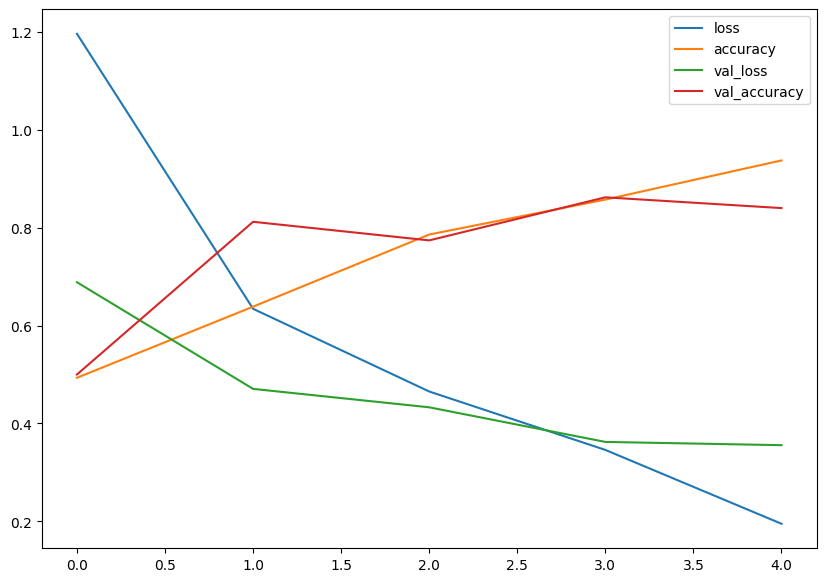

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  '''
  return seperate loss curve for test and validation
  '''

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epoch = range(len(history.history['loss']))

  # plot loss
  plt.plot(epoch, loss, label = 'training')
  plt.plot(epoch,val_loss,label = 'val_loss')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epoch,accuracy,label='training accuracy')
  plt.plot(epoch,val_accuracy, label = 'validation accuracy')
  plt.title("Accuracy")
  plt.legend()

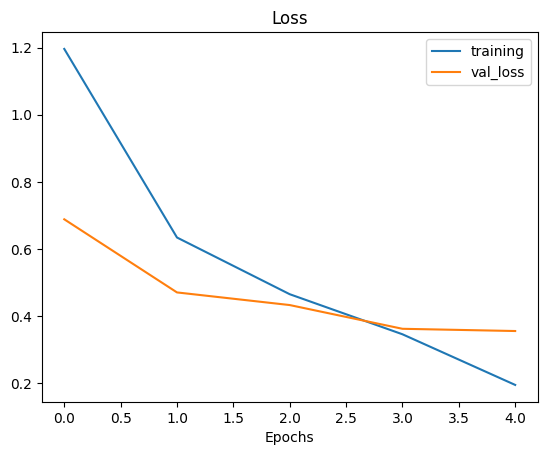

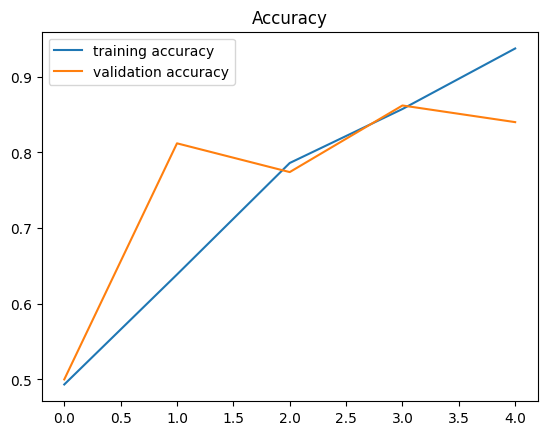

In [ ]:
plot_loss_curves(history)

In the above case we didn't encounter overfitting as the variation of the loss between the validation and traing data is not drastically changing.
***Mostly the loss curve of both traing and validation curves will be same if they cang then the model is overfitting***

## Adjust the model parameters

1. create a Baseline model
2. Beat the baaseline by overfitting a large model
3. Reduce the overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting

* Add data augmentation
* Add Regularization(such as MaxPool2D)
* Add more data...

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 105s 2s/step - loss: 0.6265 - accuracy: 0.6373 - val_loss: 0.5146 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 96s 2s/step - loss: 0.4864 - accuracy: 0.7660 - val_loss: 0.3864 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.4273 - accuracy: 0.8033 - val_loss: 0.3449 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 71s 2s/step - loss: 0.3985 - accuracy: 0.8280 - val_loss: 0.3431 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 65s 1s/step - loss: 0.3737 - accuracy: 0.8333 - val_loss: 0.3289 - val_accuracy: 0.8600


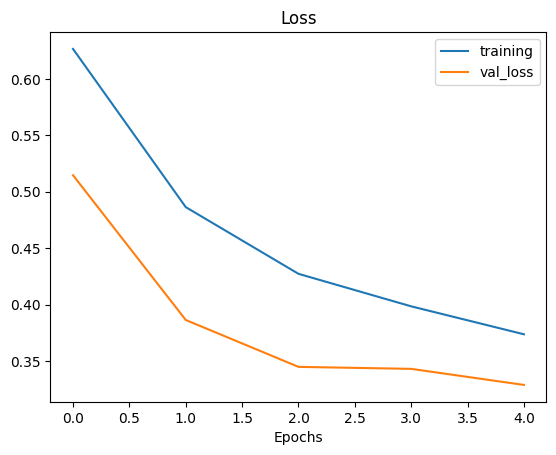

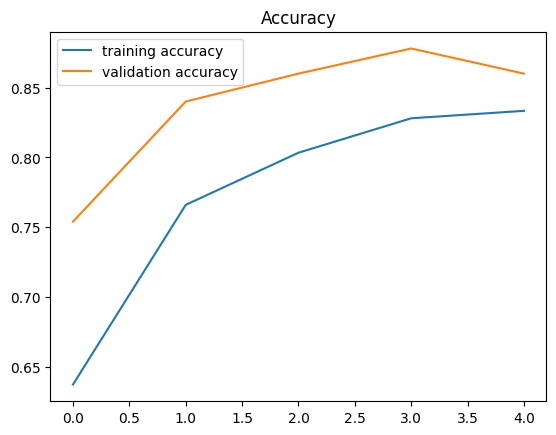

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Create ImageDataGeneration instance with data augmentation

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.3,
    horizontal_flip = True
)

# Create ImageDatagenerator without data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255)

# Test dataset

test_datagen = ImageDataGenerator(rescale = 1./255)